<a href="https://colab.research.google.com/github/SajalSinha/ProductRecommendationEngine/blob/main/Product_Recommendation_Engine_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Build a recommender engine that reviews customer ratings and purchase history to recommend items and improve sales. </u></b>

### Amazon.com is one of the largest electronic commerce and cloud computing companies.

### Just a few Amazon related facts:

### They lost $4.8 million in August 2013, when their website went down for 40 mins. They hold the patent on 1-Click buying, and licenses it to Apple. Their Phoenix fulfilment centre is a massive 1.2 million square feet. Amazon relies heavily on a Recommendation engine that reviews customer ratings and purchase history to recommend items and improve sales.


### This is a dataset related to over 2 Million customer reviews and ratings of Beauty related products sold on their website.

### It contains

* ### the unique UserId (Customer Identification),
* ### the product ASIN (Amazon's unique product identification code for each product),
* ### Ratings (ranging from 1-5 based on customer satisfaction) and
* ### the Timestamp of the rating (in UNIX time)

### This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

### This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 4/ratings_Beauty.csv')

In [4]:
df.shape

(2023070, 4)

In [5]:
df.describe(include='all') #to get an overview of the data

,UserId,ProductId,Rating,Timestamp
count,2023070,2023070,2.023070e+06,2.023070e+06
unique,1210271,249274,NaN,NaN
top,A3KEZLJ59C1JVH,B001MA0QY2,NaN,NaN
freq,389,7533,NaN,NaN
mean,NaN,NaN,4.149036e+00,1.360389e+09
std,NaN,NaN,1.311505e+00,4.611860e+07
min,NaN,NaN,1.000000e+00,9.087552e+08
25%,NaN,NaN,4.000000e+00,1.350259e+09
50%,NaN,NaN,5.000000e+00,1.372810e+09
75%,NaN,NaN,5.000000e+00,1.391472e+09


##Checking Null values

In [6]:
missing_data = pd.DataFrame(df.isnull().mean()*100)
missing_data

,0
UserId,0.0
ProductId,0.0
Rating,0.0
Timestamp,0.0


All the columns are clean

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [8]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


#Exploratory Data Analysis

##Total Count of each rating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


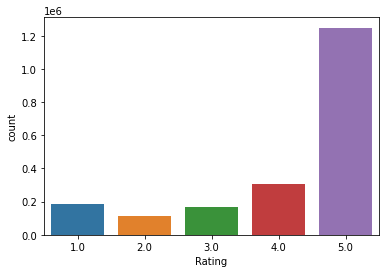

In [9]:
sns.countplot(df['Rating']) #total count of ratings.

In [10]:
len(df['UserId'].unique())

1210271

##Top Products based on sales

In [11]:
#Top 20 Products based on sales.

a = list(df['ProductId'].value_counts())
b = list(df['ProductId'].unique())
top_20_products = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['ProductID', 'Count'])
top_20_products

,ProductID,Count
0,0205616461,7533
1,0558925278,2869
2,0733001998,2477
3,0737104473,2143
4,0762451459,2088
5,1304139212,2041
6,1304139220,1918
7,130414089X,1885
8,130414643X,1838
9,1304146537,1589


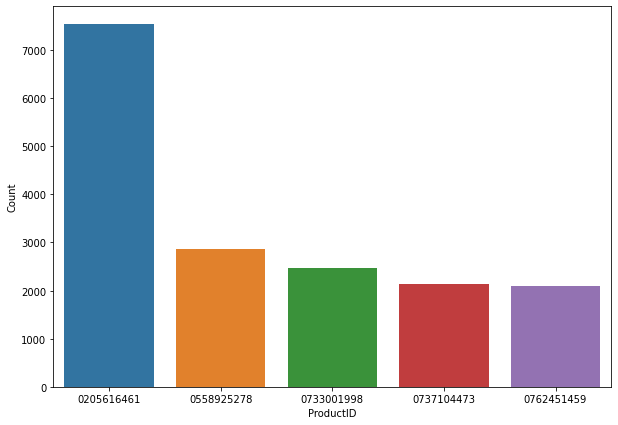

In [12]:
#Barplot of top 5 products.

plt.figure(figsize=(10,7))
sns.barplot(x=top_20_products['ProductID'].head(5),y=top_20_products['Count'].head(5))

In [13]:
#Top 20 products based on ratings

# Prod_R5 = list(df.loc[df['Rating']==5,'ProductId'])
# Prod_R4 = list(df.loc[df['Rating']==4,'ProductId'])[']=
# Prod_R3 = list(df.loc[df['Rating']==3,'ProductId'])
# Prod_R2 = list(df.loc[df['Rating']==2,'ProductId'])
# Prod_R1 = list(df.loc[df['Rating']==1,'ProductId'])
# # total_ratings = list(df['Rating'].value_counts())
# # total_ratings
# R5_count = dict((x,Prod_R5.count(x)) for x in set(Prod_R5))
# R4_count = dict((x,Prod_R4.count(x)) for x in set(Prod_R4))
# R3_count = dict((x,Prod_R3.count(x)) for x in set(Prod_R3))
# R2_count = dict((x,Prod_R2.count(x)) for x in set(Prod_R2))
# R1_count = dict((x,Prod_R1.count(x)) for x in set(Prod_R1))
# top_rating_products = topuser_rating_products[topuser_ratings_df['ProductId'].isin(top_prod)]

In [14]:
R5_count

NameError: ignored

In [ ]:
print('Number of unique users', len(df['UserId'].unique()))

In [ ]:
#top 20 users based on count of orders placed.

a = list(df['UserId'].value_counts())
b = list(df['UserId'].unique())
top_20_Users = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['UserID', 'Count'])
top_20_Users

In [ ]:
# list(df.loc(df['Rating']>=4.0,df['UserId'].value_counts()))

In [ ]:
print('Number of unique products', len(df['ProductId'].unique()))

In [ ]:
print('Unique Ratings',df['Rating'].unique())

In [ ]:
max_ratings1 = df[df['Rating'] >= 4.0]
print('Number of unique products rated high',len(max_ratings1['ProductId'].unique()))

In [ ]:
#Now we will drop timestamp column as it isn't much of help.

df.drop('Timestamp',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.2, random_state=0)

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
train_data_grouped = train_data.groupby('ProductId').mean().reset_index()

In [ ]:
train_data_grouped.head()

In [ ]:
train_data_grouped = train_data.groupby('ProductId').mean().reset_index()

In [ ]:
train_data_grouped.head()

In [ ]:
train_data_sort = train_data_grouped.sort_values(['Rating', 'ProductId'], ascending=False)

In [ ]:
train_data_sort.head()

In [ ]:
train_data.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head(10)

In [ ]:
ratings_mean_count = pd.DataFrame(train_data.groupby('ProductId')['Rating'].mean())

In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('ProductId')['Rating'].count())

In [ ]:
ratings_mean_count.head()

In [ ]:
pred_df = test_data[['UserId', 'ProductId', 'Rating']]

In [ ]:
pred_df.head()

In [ ]:
pred_df.rename(columns = {'Rating' : 'true_ratings'}, inplace=True)

In [ ]:
pred_df.head()

In [ ]:
pred_df = pred_df.merge(train_data_sort, left_on='ProductId', right_on = 'ProductId')

In [ ]:
pred_df.rename(columns = {'Rating' : 'predicted_ratings'}, inplace = True)

In [ ]:
pred_df.head()

In [ ]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Recommender model is', sqrt(MSE))

In [ ]:
!pip install surprise

In [ ]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [ ]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))

In [ ]:
data = Dataset.load_from_df(top_ratings_df[['UserId', 'ProductId', 'Rating']],reader)

In [ ]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [ ]:
type(trainset)

In [ ]:
model = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(trainset)

In [ ]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

#Evaluation

In [ ]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

In [ ]:
print(len(testset))
type(testset)

In [ ]:
# Evalute on test set
test_pred = model.test(testset)
test_pred[0]

In [ ]:

# compute RMSE
accuracy.rmse(test_pred)

In [ ]:
test_pred = svd_model.test(testset)

In [ ]:

# compute RMSE
accuracy.rmse(test_pred)

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [ ]:
gs.fit(data)

In [ ]:
gs.best_params

In [ ]:

# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

In [ ]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(test_pred, n=5)

In [ ]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])